In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [3]:
# Load Data 
data = pd.read_csv("assignment2_train-data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
data.shape

(6019, 14)

## 1. Data Describe

In [5]:
# 결측치 체크 
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
# data type 체크 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
Unnamed: 0           6019 non-null int64
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [7]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


## 2. Data Preprocessing 

### 1) Column Drop 

* 'Unnamed: 0' : index 성격의 변수이니 제거를 해 줘야 하고 
* 'New_Price' : 6000개 row 중 5195개나 결측치가 있으니 채워주는게 의미가 없어 보여요 제거해 줍시다 ... 

In [8]:
data = data.drop(['Unnamed: 0', 'New_Price'], axis=1)

### 2) Name : 차종 변수로 바꿔주기 

In [9]:
data["Name"].nunique()

1876

* 차 종류가 1876개나 되는 것을 다 고려해주는 것은 의미가 없어 보입니다 ...
* 그래서 앞의 두 글자 (제조사 + 차종) 만 남겨두고 나머지 글자는 없애버릴게요 ~ !! 

In [10]:
data["Manufacturer"] = data["Name"].apply(lambda x : x.split(' ')[0])
data["Model"] = data["Name"].apply(lambda x : x.split(' ')[1])

In [11]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4


In [12]:
data = data.drop(['Name'], axis=1)
print(data["Manufacturer"].nunique(), data["Model"].nunique()) # 회사는 31개, 차 종류는 212개가 있네여... 

31 212


Text(0, 0.5, 'Count of cars')

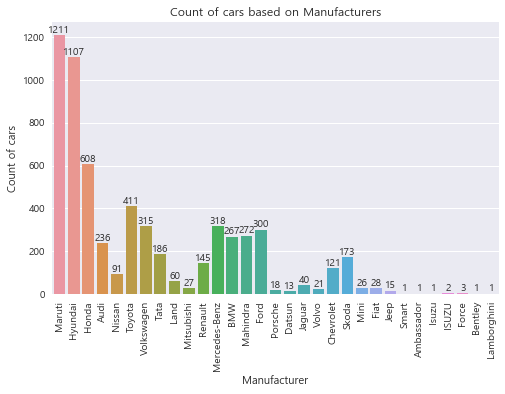

In [13]:
plt.figure(figsize = (8, 5))
plot = sns.countplot(x = 'Manufacturer', data = data)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

### 3) 숫자형 변수로 바꿔주기 + 결측값 처리하기 

* Mileage , Engine , Power 의 경우 뒤에 문자가 붙어있어요 문자를 일단 제거해줍시다 
* 근데 이걸 그냥 바로 apply 적용해 버리면.. 결측값이 있는 행 때문에 오류가 납니다 
* 결측값 행 살리고 싶다면 (= 정성을 쏟고 싶다면 = 36개 안고 가고 싶다면) 결측값 없는 데이터셋만 따로 뽑아서 apply 하고 결측값을 채워줘도 되고 
* 결측값 행을 그냥 버리고 싶다면 바로 drop 해버리면 됩니다 ... 
* 저는 그냥 결측치 없는 행만 볼게용 ^_ ^ ㅋㅋㅋ

In [14]:
data = data.dropna(subset = ["Mileage", "Engine", "Power"])
data.shape

(5981, 13)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 13 columns):
Location             5981 non-null object
Year                 5981 non-null int64
Kilometers_Driven    5981 non-null int64
Fuel_Type            5981 non-null object
Transmission         5981 non-null object
Owner_Type           5981 non-null object
Mileage              5981 non-null object
Engine               5981 non-null object
Power                5981 non-null object
Seats                5975 non-null float64
Price                5981 non-null float64
Manufacturer         5981 non-null object
Model                5981 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 654.2+ KB


In [16]:
# 데이터 형태 바꿀 수 있는 변수들은 일단 바로 바꿔주고 
data['Mileage'] = data['Mileage'].apply(lambda x: float(x.split(' ')[0]))
data['Engine'] = data['Engine'].apply(lambda x: float(x.split(' ')[0]))

In [17]:
# 얘는 좀 문제가 있어요...
data['Power'] = data['Power'].apply(lambda x: x.split(' ')[0])

In [18]:
data.loc[data["Power"] == "null"] # 바로 float으로 바꾸는게 안 된다더니 ... 이런 친구들이 있었어요 허허허 

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Manufacturer,Model
76,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null,5.0,2.00,Ford,Fiesta
79,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,null,5.0,1.30,Hyundai,Santro
89,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null,5.0,2.10,Hyundai,Santro
120,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null,5.0,0.85,Hyundai,Santro
143,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null,5.0,1.67,Hyundai,Santro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,null,5.0,1.20,Hyundai,Santro
5893,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,null,NaN,1.75,Maruti,Estilo
5925,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,null,5.0,2.85,Skoda,Laura
5943,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,null,6.0,1.70,Mahindra,Jeep


In [19]:
# Model로 groupby 해서 mean 값으로 null 값을 채워줄게요 ...
# 그냥 날려버리셔도 괜찮슴니다 ...... 

# 저의 코딩 실력이 부족하여 dataframe 으로 나눠서 합쳤는데, 혹시라도 apply나 map을 써서 바로 적용할 수 있으신 분 있으시다면... 저 좀 알려주세요 ..... ㅜㅜ 
# error = 'coerce' 쓰면 됨  

data3 = data.loc[data["Power"] != "null"] 
data3.shape

(5874, 13)

In [20]:
data3['Power'] = data3['Power'].astype("float")

C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data4 = data.loc[data["Power"] == "null"] 
data4.shape

(107, 13)

In [22]:
data4 = pd.merge(data4, pd.DataFrame(data3["Power"].groupby(data3['Model']).mean()), on = "Model", how = "inner")
data4

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power_x,Seats,Price,Manufacturer,Model,Power_y
0,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,null,5.0,2.00,Ford,Fiesta,74.274324
1,Chennai,2009,80524,Petrol,Manual,Second,15.3,1596.0,null,5.0,2.50,Ford,Fiesta,74.274324
2,Hyderabad,2008,83000,Diesel,Manual,Second,17.8,1399.0,null,5.0,2.40,Ford,Fiesta,74.274324
3,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,null,5.0,1.30,Hyundai,Santro,62.279310
4,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086.0,null,5.0,2.10,Hyundai,Santro,62.279310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Chennai,2004,95000,Petrol,Manual,First,15.9,1298.0,null,5.0,0.80,Maruti,Esteem,85.000000
92,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953.0,null,NaN,7.00,Ford,Endeavour,169.181081
93,Mumbai,2007,116000,Diesel,Manual,Third,10.9,2499.0,null,7.0,3.75,Ford,Endeavour,169.181081
94,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,null,0.0,18.00,Audi,A4,163.634416


In [23]:
data4 = data4.drop(["Power_x"], axis=1)
data4 = data4.rename(columns = {'Power_y' : 'Power'})

In [24]:
data4.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Manufacturer,Model,Power
0,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,5.0,2.0,Ford,Fiesta,74.274324
1,Chennai,2009,80524,Petrol,Manual,Second,15.3,1596.0,5.0,2.5,Ford,Fiesta,74.274324
2,Hyderabad,2008,83000,Diesel,Manual,Second,17.8,1399.0,5.0,2.4,Ford,Fiesta,74.274324
3,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,5.0,1.3,Hyundai,Santro,62.279310
4,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086.0,5.0,2.1,Hyundai,Santro,62.279310


In [25]:
data4.shape

(96, 13)

In [26]:
data = pd.concat([data3, data4], axis=0)

C:\Users\LG\venv\jbeen\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [27]:
data.shape

(5970, 13)

In [28]:
data.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Manufacturer,Mileage,Model,Owner_Type,Power,Price,Seats,Transmission,Year
0,998.0,CNG,72000,Mumbai,Maruti,26.60,Wagon,First,58.16,1.75,5.0,Manual,2010
1,1582.0,Diesel,41000,Pune,Hyundai,19.67,Creta,First,126.20,12.50,5.0,Manual,2015
2,1199.0,Petrol,46000,Chennai,Honda,18.20,Jazz,First,88.70,4.50,5.0,Manual,2011
3,1248.0,Diesel,87000,Chennai,Maruti,20.77,Ertiga,First,88.76,6.00,7.0,Manual,2012
4,1968.0,Diesel,40670,Coimbatore,Audi,15.20,A4,Second,140.80,17.74,5.0,Automatic,2013


In [29]:
data.loc[data["Power"] == "null"] # 다 없어졌어요 ~~ !! 

C:\Users\LG\venv\jbeen\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Engine,Fuel_Type,Kilometers_Driven,Location,Manufacturer,Mileage,Model,Owner_Type,Power,Price,Seats,Transmission,Year


In [30]:
data.isnull().sum()

Engine               0
Fuel_Type            0
Kilometers_Driven    0
Location             0
Manufacturer         0
Mileage              0
Model                0
Owner_Type           0
Power                0
Price                0
Seats                3
Transmission         0
Year                 0
dtype: int64

In [31]:
# Seats 변수 결측값은 위의 과정처럼 채우면 너무너무 좋지만
# 저는 그냥 날릴게여 ㅎㅎㅎㅎㅎㅎㅎ
data = data.dropna()
data.isnull().sum()

Engine               0
Fuel_Type            0
Kilometers_Driven    0
Location             0
Manufacturer         0
Mileage              0
Model                0
Owner_Type           0
Power                0
Price                0
Seats                0
Transmission         0
Year                 0
dtype: int64

In [32]:
data.info() # 각 데이터의 특성에 맞게 타입을 바꿔주었습니다 ... 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5967 entries, 0 to 95
Data columns (total 13 columns):
Engine               5967 non-null float64
Fuel_Type            5967 non-null object
Kilometers_Driven    5967 non-null int64
Location             5967 non-null object
Manufacturer         5967 non-null object
Mileage              5967 non-null float64
Model                5967 non-null object
Owner_Type           5967 non-null object
Power                5967 non-null float64
Price                5967 non-null float64
Seats                5967 non-null float64
Transmission         5967 non-null object
Year                 5967 non-null int64
dtypes: float64(5), int64(2), object(6)
memory usage: 652.6+ KB


## 3. Target Distribution 

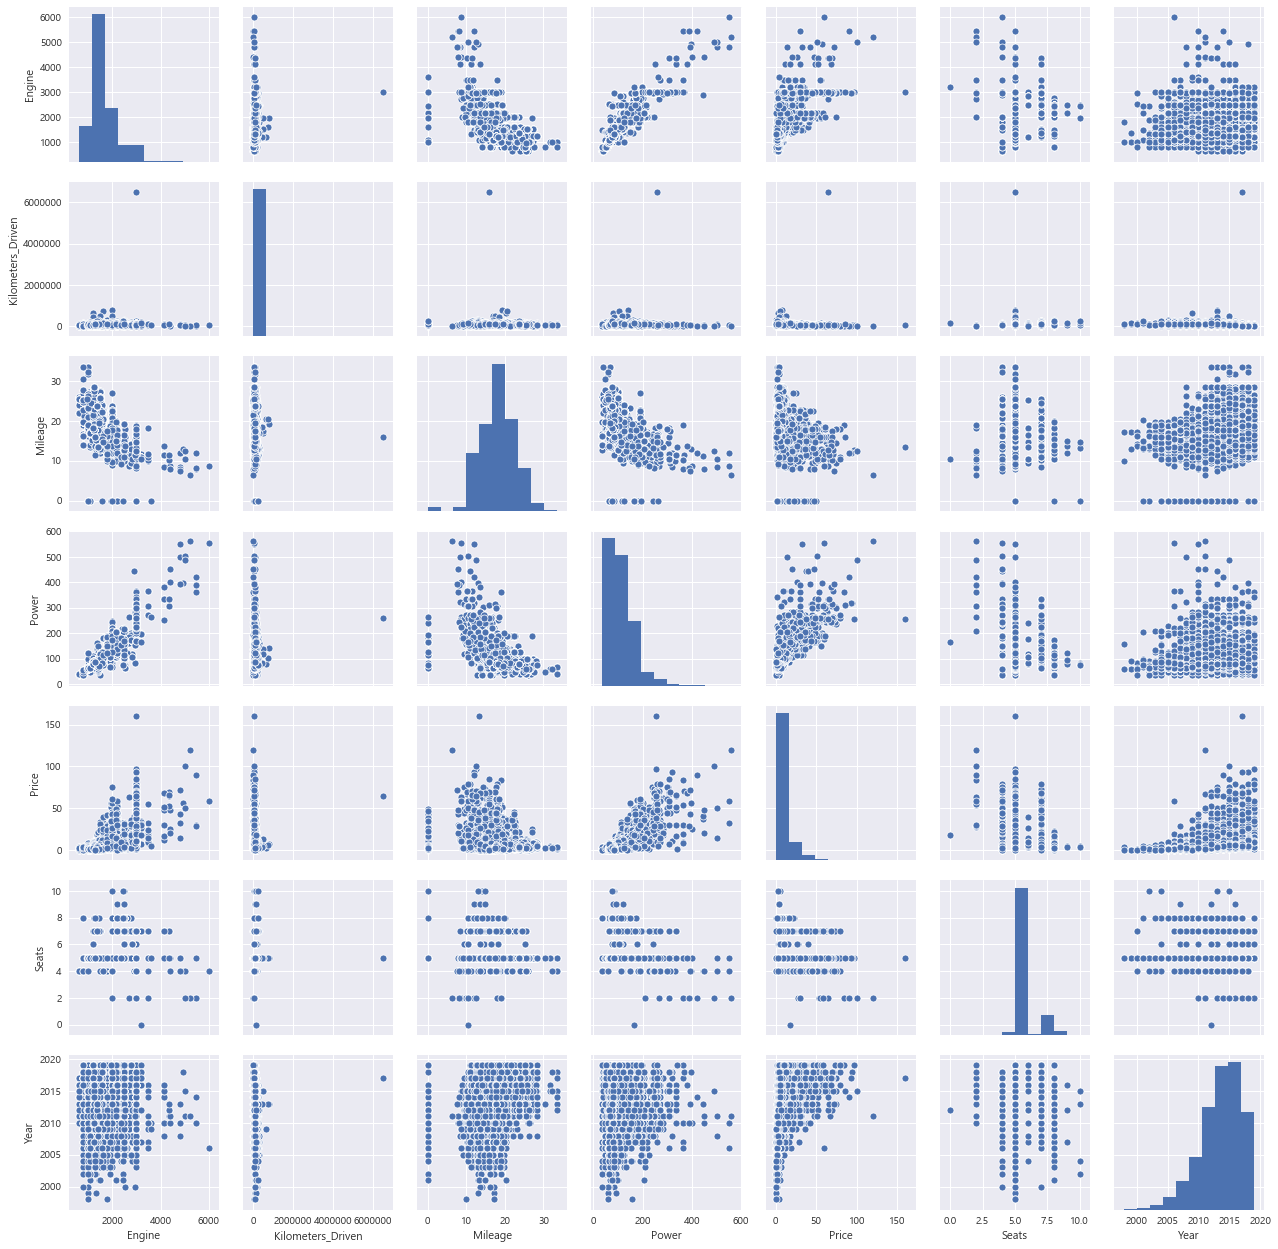

In [33]:
# 연속형 변수들과 target 변수 사이의 pairplot 
sns.pairplot(data) 
plt.show()

* 일단 타겟변수인 Price와 비교를 해 보아야 하니, 밑에서 세번째 줄만 추세를 볼게요 !! 
* 타겟변수인 Price 변수와 비교해 봤을 때, 좀 튀는 점 하나가 보이져...?? (Kilometers_Driven 제일 오른쪽 점, Seats 제일 위쪽에 있는 점 등) 
* Kilometers_Driven 제일 오른쪽 점은 제거를 먼저 한 후에 (이상점), 타겟분포를 살펴볼게요 

In [34]:
# Kilometers_Driven에서 보이는 Outlier
data.sort_values("Kilometers_Driven",ascending=False).head(1)

,Engine,Fuel_Type,Kilometers_Driven,Location,Manufacturer,Mileage,Model,Owner_Type,Power,Price,Seats,Transmission,Year
2328,2993.0,Diesel,6500000,Chennai,BMW,15.97,X5,First,258.0,65.0,5.0,Automatic,2017


In [35]:
data = data.loc[data["Kilometers_Driven"]<6500000]
print(data.shape)

(5966, 13)


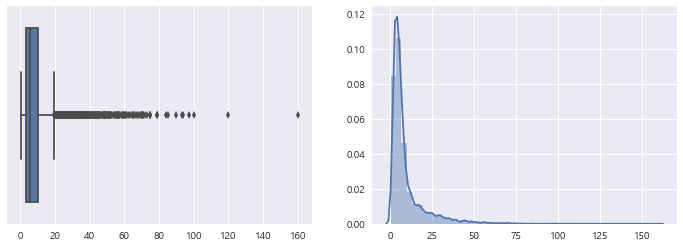

In [36]:
# target distribution 
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["Price"]], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

* 왼쪽으로 너무 지나치게 치우쳐져 있죠.. 이렇게 되면 회귀 모형이 등분산성을 만족하지 않는 문제가 발생할 수 있어요 
* 일단 결측치 제거에 앞서, log Transformation 을 통해 타겟변수의 분포를 바꿔 줘 볼게용 ~! 

In [37]:
data["log_Price"] = np.log1p(data["Price"])
data.head()

,Engine,Fuel_Type,Kilometers_Driven,Location,Manufacturer,Mileage,Model,Owner_Type,Power,Price,Seats,Transmission,Year,log_Price
0,998.0,CNG,72000,Mumbai,Maruti,26.60,Wagon,First,58.16,1.75,5.0,Manual,2010,1.011601
1,1582.0,Diesel,41000,Pune,Hyundai,19.67,Creta,First,126.20,12.50,5.0,Manual,2015,2.602690
2,1199.0,Petrol,46000,Chennai,Honda,18.20,Jazz,First,88.70,4.50,5.0,Manual,2011,1.704748
3,1248.0,Diesel,87000,Chennai,Maruti,20.77,Ertiga,First,88.76,6.00,7.0,Manual,2012,1.945910
4,1968.0,Diesel,40670,Coimbatore,Audi,15.20,A4,Second,140.80,17.74,5.0,Automatic,2013,2.930660


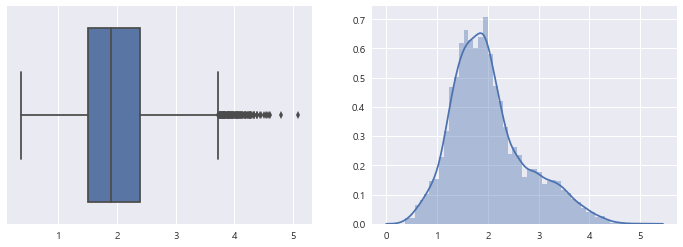

In [38]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["log_Price"]], ax=ax1)
sns.distplot(data[["log_Price"]],ax=ax2)

* 훨씬 나아진게 보이죠...?? 
* 로그 변환 전/후 그래프를 보았을 때.. 상위 2개의 값이 지나치게 커 보이므로.. 이상점이라고 판단하고 제거를 하겠습니돵 

In [39]:
# 2개의 Outlier 
data.sort_values("Price", ascending=False).head(2)

,Engine,Fuel_Type,Kilometers_Driven,Location,Manufacturer,Mileage,Model,Owner_Type,Power,Price,Seats,Transmission,Year,log_Price
4079,2993.0,Diesel,25000,Hyderabad,Land,13.33,Rover,First,255.0,160.0,5.0,Automatic,2017,5.081404
5781,5204.0,Petrol,6500,Delhi,Lamborghini,6.40,Gallardo,Third,560.0,120.0,2.0,Automatic,2011,4.795791


* 이유가 있었어용 랜드로버랑 람보르기니 여뜸..ㅎㅁㅎ ;;; 그냥 제거해 줍시다...... 
* 이 두 개의 점은 회귀계수 추정에 긍정적인 영향을 주는 점일 수 있어서, 사실 제거하시면 안됩니다 (influential point or leverage point) 
* 그냥 다시 재실행하기 귀차나서 ... 냅둘게요.. 제거하지 말고도 한번 해보십쇼 

In [40]:
data = data.loc[data["Price"]<120.0]
print(data.shape)

(5964, 14)


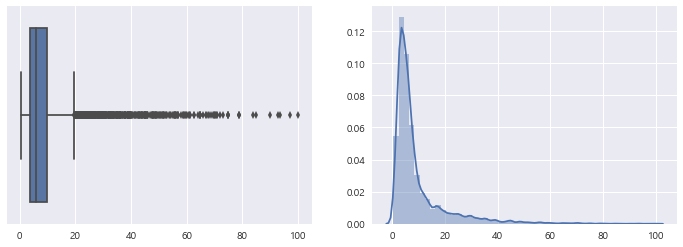

In [41]:
# 이상점 제거 후의 target 분포 
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["Price"]], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

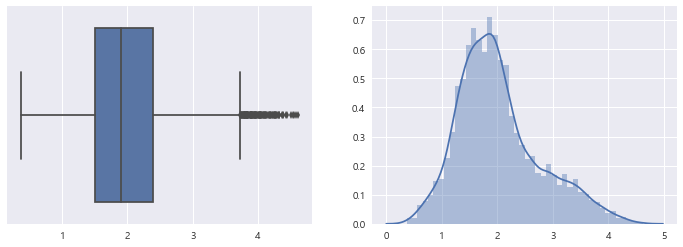

In [42]:
# 이상점 제거 후의 log(target) 분포 
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data[["log_Price"]], ax=ax1)
sns.distplot(data[["log_Price"]],ax=ax2)

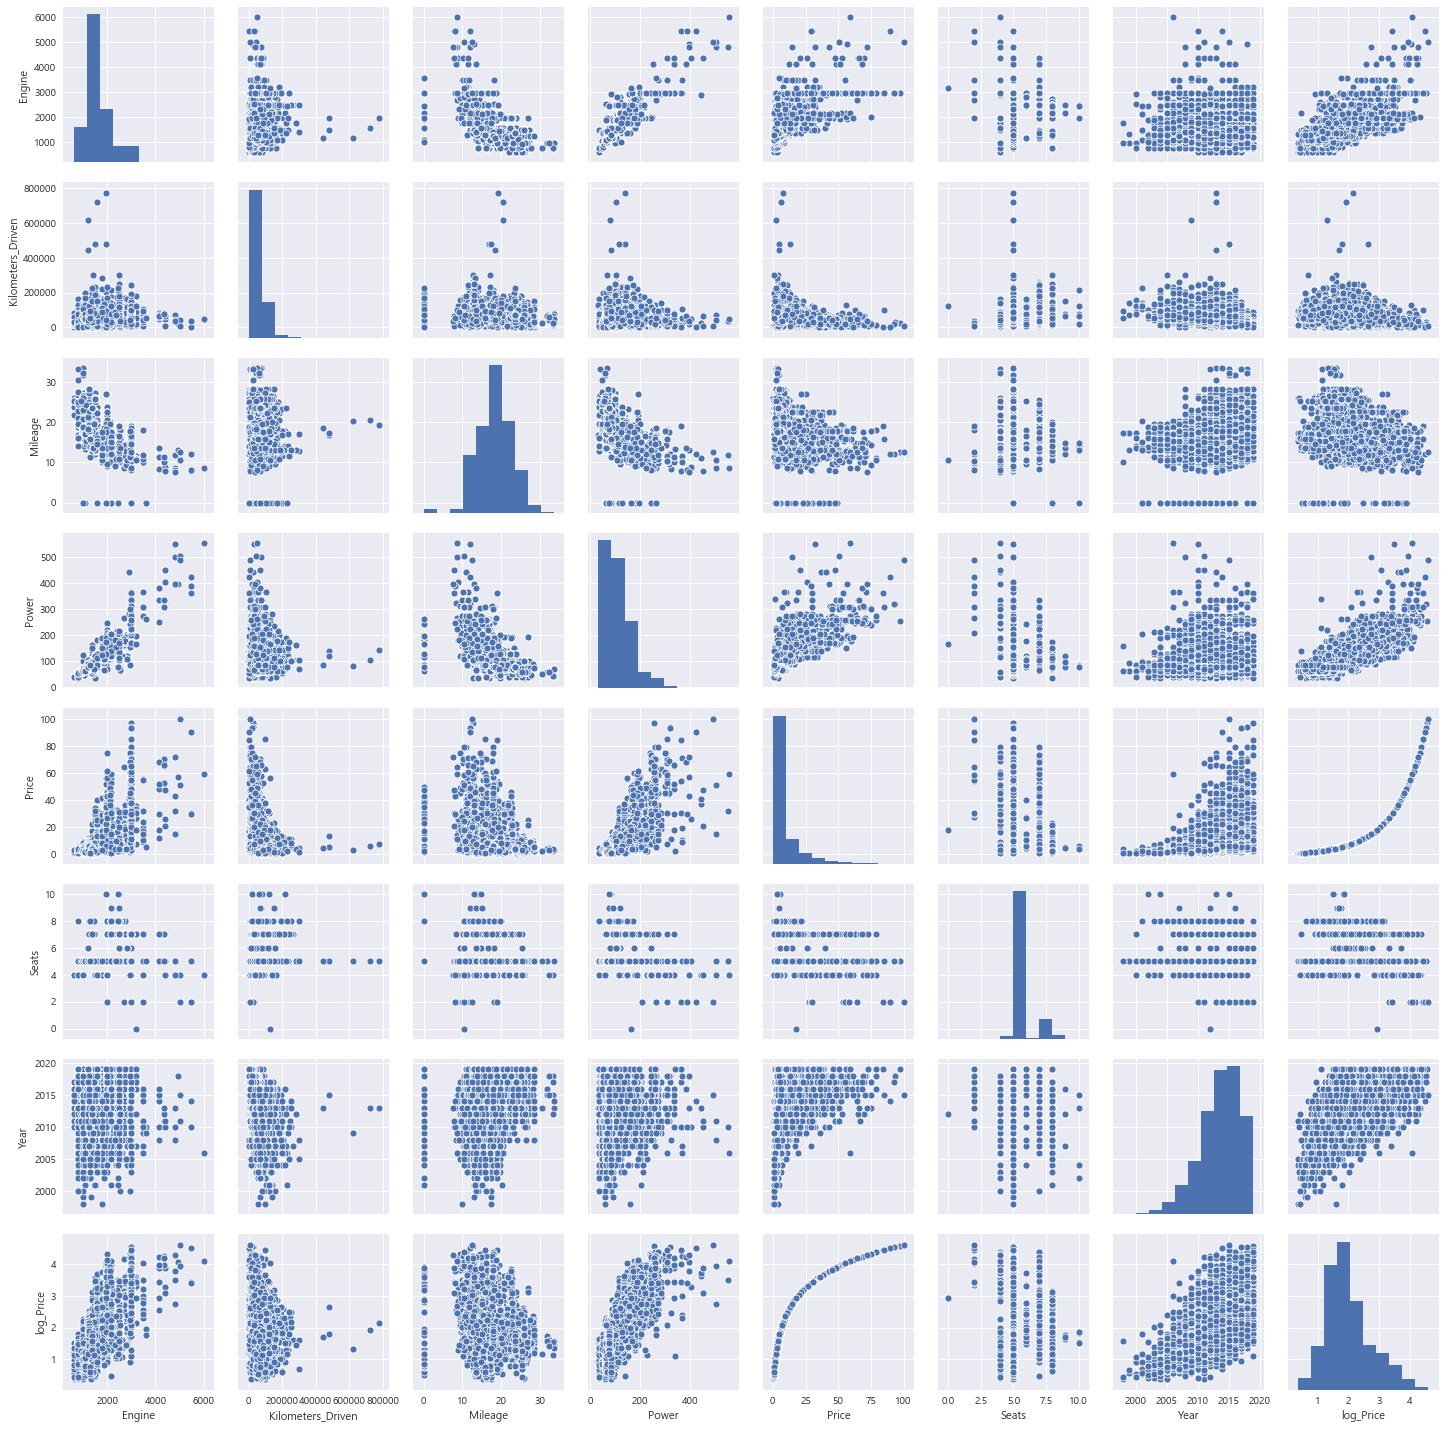

In [43]:
# 연속형 변수들과 target 변수 사이의 pairplot 
sns.pairplot(data) 
plt.show()

* price 있는 다섯번째 줄, log_price 있는 마지막 줄을 보시면 됩니다 
* kilometers 변수는 좀 그래 보이네요 ... 일단 이 점을 생각하고 넘어가 봅시다 

## 4. Variable 

### 1) Continuous Variable

In [52]:
X = data.drop(['Price', 'log_Price'], axis=1)
y = data.Price

In [53]:
# correlation matrix 
X.corr()

,Engine,Kilometers_Driven,Mileage,Power,Seats,Year
Engine,1.000000,0.159427,-0.601077,0.864969,0.405148,-0.053465
Kilometers_Driven,0.159427,1.000000,-0.144772,0.000723,0.210315,-0.449764
Mileage,-0.601077,-0.144772,1.000000,-0.502595,-0.318684,0.309823
Power,0.864969,0.000723,-0.502595,1.000000,0.108365,0.030982
Seats,0.405148,0.210315,-0.318684,0.108365,1.000000,0.009820
Year,-0.053465,-0.449764,0.309823,0.030982,0.009820,1.000000


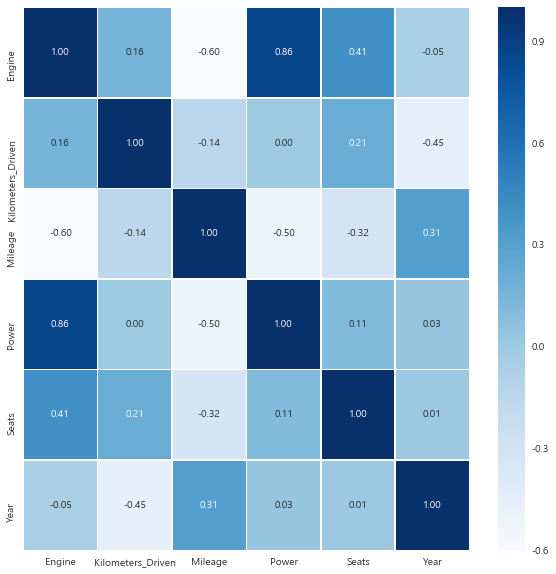

In [54]:
# heatmap : correlation matrix 시각화 
plt.figure(figsize=(10,10))
sns.heatmap(data = X.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

* Engine과 Power 말고는 딱히.. 상관관계가 없어 보이네여...?? 

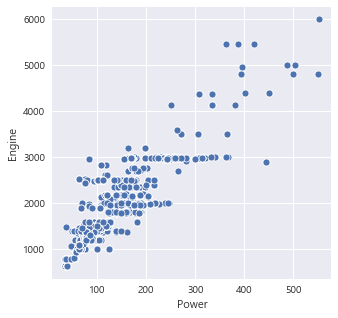

In [55]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x= "Power", y="Engine", data=data)

* 갱장한 선형관계를 보이고 있군여 ... 둘 중 하나는 제거해 주는게 좋아요 ... vif를 체크해 볼게용 

In [57]:
dummies = ["Fuel_Type", "Location", "Manufacturer", "Model", "Owner_Type", "Transmission"]
continuous = X.drop(dummies, axis=1)

In [58]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(continuous.values, i) for i in range(continuous.shape[1])]
vif["features"] = continuous.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
5,117.640112,Year
4,73.980189,Seats
0,61.142195,Engine
3,31.689991,Power
2,27.835253,Mileage
1,3.683650,Kilometers_Driven


* 와웅 예상외로 Year 변수가 엄청 다중공선성이 높게 나오네여...? 
* 이거 먼저 제거해 볼게여 

In [60]:
continuous2 = continuous.drop(["Year"], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(continuous2.values, i) for i in range(continuous2.shape[1])]
vif["features"] = continuous2.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,60.622030,Engine
4,38.773001,Seats
3,28.381388,Power
2,12.982062,Mileage
1,3.637616,Kilometers_Driven


* Engine도 제거를 해 줍시다 

In [61]:
continuous3 = continuous2.drop(["Engine"], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(continuous3.values, i) for i in range(continuous3.shape[1])]
vif["features"] = continuous3.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,20.540400,Seats
1,10.366259,Mileage
2,5.506269,Power
0,3.471708,Kilometers_Driven


* 제가 드린 ppt를 읽어보시면 vif > 10 이라면 다중공선성 크다고 판단하고 제거하는데요, 
* 사실 10 < vif < 20 이면 그냥저냥한 multicollinearity, vif > 20 이면 strong multicollinearity 존재한다고 봐요 
* 여기서 이렇게 나와서 당황해서 그런건 아니구 진짜 그렇게 판단함 ...ㅎㅎ ;;;
* 일단 seats, mileage, power, killometers_driven 변수 모두를 keep 하는 방향도 모색해 보고 
* seats 변수 한번만 제거해서 비교해 볼게요 

In [62]:
continuous4 = continuous3.drop(["Seats"], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(continuous4.values, i) for i in range(continuous4.shape[1])]
vif["features"] = continuous4.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,3.964154,Mileage
2,3.437162,Power
0,2.935875,Kilometers_Driven


* 이게 훨씬 낫긴 낫군여 ....... ㅎㅎ;;;;;; 일단 킵 고잉 

#### +) 연속형 변수들의 분포 살펴보기 

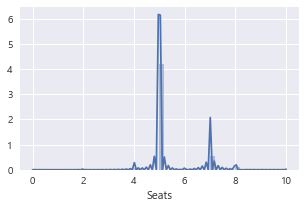

In [83]:
# Seats
plt.figure(figsize=(5, 3))
sns.distplot(continuous3["Seats"])

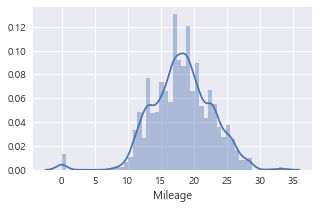

In [84]:
# Mileage
plt.figure(figsize=(5, 3))
sns.distplot(continuous3["Mileage"])

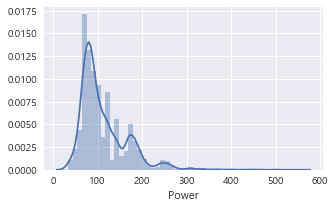

In [85]:
# Power
plt.figure(figsize=(5, 3))
sns.distplot(continuous3["Power"])

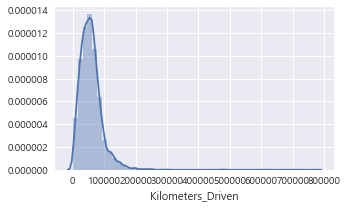

In [86]:
# Kilometers_Driven
plt.figure(figsize=(5, 3))
sns.distplot(continuous3["Kilometers_Driven"])

* 전처리가 정말 끝이 없어요 ...
* Mileage 변수 빼고는 변수 normalization 과정이 필요해 보입니다 ... 

In [87]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 

scaled = scaler.fit_transform(continuous3)  
continuous3_s = pd.DataFrame(scaled, index=continuous3.index, columns=continuous3.columns)
continuous3_s.head()

C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Kilometers_Driven,Mileage,Power,Seats
0,0.379980,1.869250,-1.019604,-0.349084
1,-0.438082,0.327335,0.254837,-0.349084
2,-0.306136,0.000263,-0.447566,-0.349084
3,0.775817,0.572084,-0.446443,2.135327
4,-0.446790,-0.667233,0.528306,-0.349084


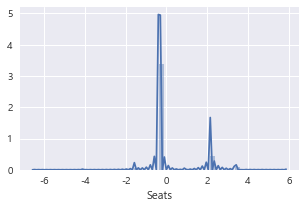

In [88]:
# Seats
plt.figure(figsize=(5, 3))
sns.distplot(continuous3_s["Seats"])

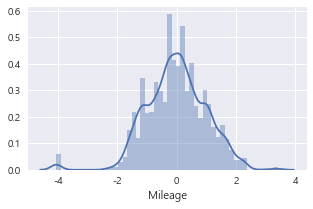

In [89]:
# Mileage
plt.figure(figsize=(5, 3))
sns.distplot(continuous3_s["Mileage"])

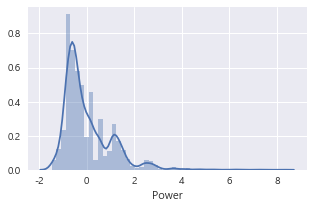

In [90]:
# Power
plt.figure(figsize=(5, 3))
sns.distplot(continuous3_s["Power"])

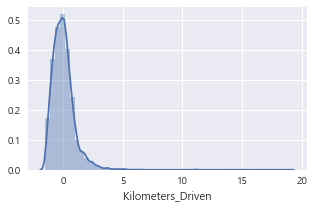

In [91]:
# Kilometers_Driven
plt.figure(figsize=(5, 3))
sns.distplot(continuous3_s["Kilometers_Driven"])

* x축의 범위가 바뀐 것을 볼 수 있죠 ~ ? 

### 2) Dummy Variable

* Object type의 변수들을 dummy화 해 보겠슴니다 ... 
* Fuel_Type, Location, Manufacturer, Model, Owner_Type, Transmission 이 있네여 
* 각각 몇개씩 unique 값을 갖고 있는지 볼게용 

In [46]:
dummies = ["Fuel_Type", "Location", "Manufacturer", "Model", "Owner_Type", "Transmission"]

for dummy in dummies : 
    print(dummy, ": ", data[dummy].nunique())

Fuel_Type :  4
Location :  11
Manufacturer :  29
Model :  202
Owner_Type :  4
Transmission :  2


* Model 변수는 (제가 생성하긴 했지만) 너무 너무 많아서 모두 더미화하면 오버피팅 문제가 일어날 것 같아요.. 제외합시다 
* 다른 변수들은 Price 분포와 과연 연관이 있는지 ... 한번 보겠슴니당 

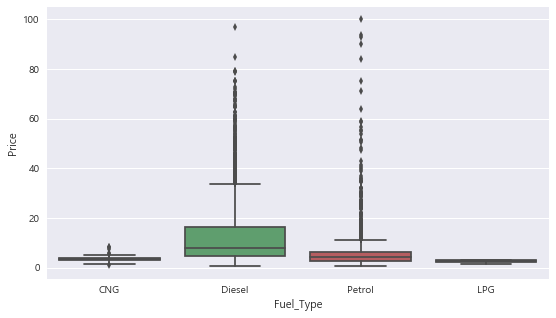

In [49]:
# Fuel_Type vs Price
plt.figure(figsize=(9, 5))
sns.boxplot(x='Fuel_Type', y='Price', data=data)

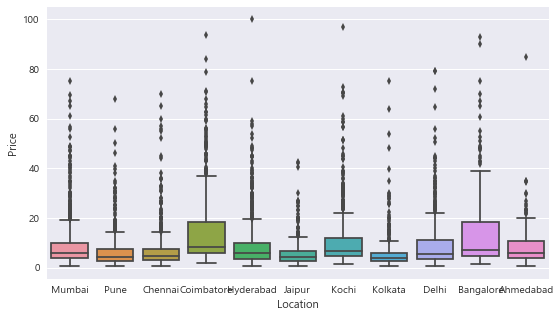

In [47]:
# Location vs Price
plt.figure(figsize=(9, 5))
sns.boxplot(x='Location', y='Price', data=data)

##### Manufacturer vs Price
plt.figure(figsize=(9, 5))
sns.boxplot(x='Manufacturer', y='Price', data=data)

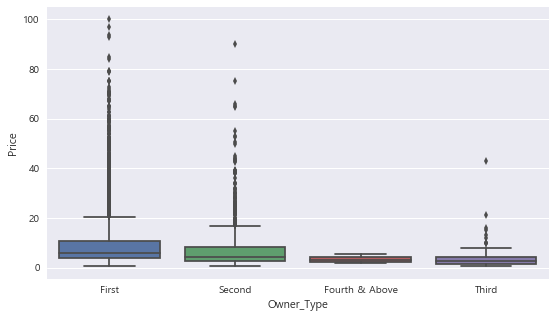

In [51]:
# Owner_Type vs Price
plt.figure(figsize=(9, 5))
sns.boxplot(x='Owner_Type', y='Price', data=data)

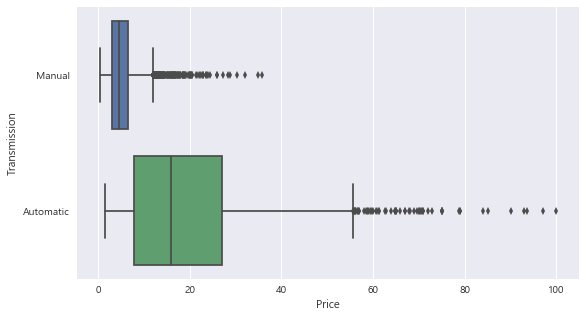

In [48]:
# Transmission vs Price
plt.figure(figsize=(9, 5))
sns.boxplot(x='Price', y='Transmission', data=data)

* 뭔가 다 나름 값의 분포가 바뀌는 것을 보니 더미화 해 주면 좋을 것 같긴 합니다... 
* Transmission 같은 경우 2개 뿐이니 map 을 사용하고, 나머지는 그냥 pd.get_dummies 혹은 LabelEncoding 해 줄게요 
* 사실 그냥 다 pd.get_dummies 해도 상관은 엄슴 ... 

In [70]:
dummy_variables = ["Fuel_Type", "Location", "Manufacturer", "Owner_Type"]

for each in dummy_variables:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first = False)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop([each], axis=1)

In [72]:
data['Transmission'] = data['Transmission'].map(lambda x : 1 if x == "Manual" else 0)

In [75]:
data.head()

,Engine,Kilometers_Driven,Mileage,Model,Power,Price,Seats,Transmission,Year,log_Price,...,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,998.0,72000,26.60,Wagon,58.16,1.75,5.0,1,2010,1.011601,...,0,0,0,0,0,0,1,0,0,0
1,1582.0,41000,19.67,Creta,126.20,12.50,5.0,1,2015,2.602690,...,0,0,0,0,0,0,1,0,0,0
2,1199.0,46000,18.20,Jazz,88.70,4.50,5.0,1,2011,1.704748,...,0,0,0,0,0,0,1,0,0,0
3,1248.0,87000,20.77,Ertiga,88.76,6.00,7.0,1,2012,1.945910,...,0,0,0,0,0,0,1,0,0,0
4,1968.0,40670,15.20,A4,140.80,17.74,5.0,0,2013,2.930660,...,0,0,0,0,0,0,0,0,1,0


In [76]:
data.columns

Index(['Engine', 'Kilometers_Driven', 'Mileage', 'Model', 'Power', 'Price',
       'Seats', 'Transmission', 'Year', 'log_Price', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Manufacturer_Ambassador',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Bentley',
       'Manufacturer_Chevrolet', 'Manufacturer_Datsun', 'Manufacturer_Fiat',
       'Manufacturer_Force', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_ISUZU', 'Manufacturer_Isuzu',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Land',
       'Manufacturer_Mahindra', 'Manufacturer_Maruti',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mini',
       'Manufacturer_Mitsubishi', 

* 이제 드디어 전처리가 끝이 났습니다 ㅎㅎㅎㅎㅎㅎ하하하 

In [92]:
discrete = data.drop(['Engine', 'Kilometers_Driven', 'Mileage', 'Model', 'Power', 'Price', 
                      'Seats', 'Transmission', 'Year', 'log_Price'], axis=1)

In [93]:
price = data.Price
log_price = data.log_Price

In [94]:
final = pd.concat([continuous3_s, discrete, price, log_price], axis=1)
final.head()

,Kilometers_Driven,Mileage,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Location_Ahmedabad,Location_Bangalore,...,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Price,log_Price
0,0.379980,1.869250,-1.019604,-0.349084,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.75,1.011601
1,-0.438082,0.327335,0.254837,-0.349084,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,12.50,2.602690
2,-0.306136,0.000263,-0.447566,-0.349084,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,4.50,1.704748
3,0.775817,0.572084,-0.446443,2.135327,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,6.00,1.945910
4,-0.446790,-0.667233,0.528306,-0.349084,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,17.74,2.930660


In [95]:
final.shape

(5964, 54)

In [96]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5964 entries, 0 to 95
Data columns (total 54 columns):
Kilometers_Driven             5964 non-null float64
Mileage                       5964 non-null float64
Power                         5964 non-null float64
Seats                         5964 non-null float64
Fuel_Type_CNG                 5964 non-null uint8
Fuel_Type_Diesel              5964 non-null uint8
Fuel_Type_LPG                 5964 non-null uint8
Fuel_Type_Petrol              5964 non-null uint8
Location_Ahmedabad            5964 non-null uint8
Location_Bangalore            5964 non-null uint8
Location_Chennai              5964 non-null uint8
Location_Coimbatore           5964 non-null uint8
Location_Delhi                5964 non-null uint8
Location_Hyderabad            5964 non-null uint8
Location_Jaipur               5964 non-null uint8
Location_Kochi                5964 non-null uint8
Location_Kolkata              5964 non-null uint8
Location_Mumbai               5964 no

# Modeling
> 1. from sklearn.linear_model import LinearRegression
2. import statsmodels.api as sm

## 1. sklearn LinearRegression 

In [97]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [99]:
X = final.drop(["Price", "log_Price"], axis=1)
y = final.log_Price

In [100]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
# predict
pred = model.predict(X_train)

In [103]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.8296569163674229

In [104]:
mean_squared_error(y_train, pred)

0.0941513185145966

In [105]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[-1.44618917e-01  5.04515832e-02  3.88062402e-01  7.85384381e-02
 -2.36370263e-02  2.29161578e-01 -1.72364534e-01 -3.31600176e-02
 -3.04912580e-02  1.18337478e-01 -5.89863040e-03  2.45294013e-01
 -7.84592003e-02  4.94287993e-02 -5.03959721e-02  1.18527873e-01
 -2.88793424e-01 -5.37166851e-02 -2.38329936e-02 -2.22390986e-01
  3.58595837e-01  2.40934024e-01 -1.24900090e-16 -5.35011252e-01
 -3.95394792e-01 -3.82988169e-01 -1.95506332e-01 -2.01609647e-01
 -1.68781198e-01 -1.89027766e-01 -4.75189648e-02  1.66533454e-16
  3.29651175e-01  2.39250795e-01  8.03234302e-01 -2.79593738e-01
 -2.10449776e-01  4.20369415e-01  9.08138029e-01  3.12563851e-02
 -1.87399009e-01  2.24133660e-01 -1.60596285e-01 -1.12913399e-01
 -4.71757568e-01  1.26451639e-01 -1.52055031e-01  2.30978652e-01
  2.61231906e-01 -1.09259136e-01  4.19068528e-02 -1.93879623e-01]
1.7813052386610715


In [106]:
# test data R-square
model.score(X_test, y_test)

0.8339542747808956

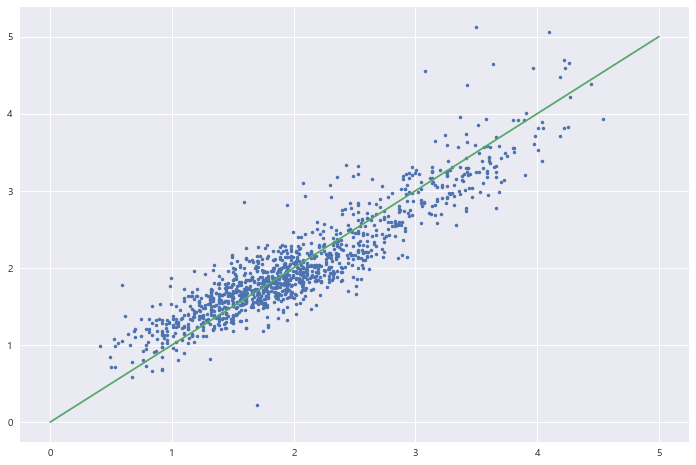

In [109]:
# 예측 vs 실제 데이터 plot
plt.plot(y_test, model.predict(X_test), '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 5, 100)
y = x
plt.plot(x, y)
plt.show()

* 예측 good... ! 성능도 good good 
* log(Price) = beta0 + beta1 * X1 + ... 이런 식이 나오게 됩니다 

### Ridge, Lasso Regression 

In [110]:
ridge = Ridge(alpha=1.0) # alpha: 정규화의 정도를 결정해주는 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
# R-square
ridge.score(X_train, y_train)

0.8296002096987186

In [114]:
# Lasso
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.6923543441014703

* 그냥 한거랑 Ridge 는 좋은데 Lasso는 설명력이 별로 좋지는 않네여 

## 2. statsmodel OLS

In [115]:
import statsmodels.api as sm

In [148]:
X = final.drop(["Price", "log_Price"], axis=1)
y = final.log_Price

In [149]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     606.9
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:35:36   Log-Likelihood:                -1392.6
No. Observations:                5964   AIC:                             2883.
Df Residuals:                    5915   BIC:                             3211.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Kilometers_Driven   

* wow 대부분의 변수들이 설명력이 아주 좋네여 
* Manufacturer 변수들에 p-value가 0.3이 되는 변수들이 있으므로 Manufacturer 변수들을 통째로 제거해 보겠습니다 
* 이것이 backward 과정입니다 

In [150]:
X2 = X.drop(['Manufacturer_Ambassador',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Bentley',
       'Manufacturer_Chevrolet', 'Manufacturer_Datsun', 'Manufacturer_Fiat',
       'Manufacturer_Force', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_ISUZU', 'Manufacturer_Isuzu',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Land',
       'Manufacturer_Mahindra', 'Manufacturer_Maruti',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mini',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Renault', 'Manufacturer_Skoda',
       'Manufacturer_Tata', 'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo'], axis=1)

In [151]:
model = sm.OLS(y, X2)
result2 = model.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1010.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:35:42   Log-Likelihood:                -2279.9
No. Observations:                5964   AIC:                             4602.
Df Residuals:                    5943   BIC:                             4742.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven     

* Manufacturer 있는 모델 : adj R square 0.830 , AIC 2883
* Manufacturer 없는 모델 : adj R square 0.773 , AIC 4602
* 변수가 더 많이 들어가긴 했지만 변수 개수를 고려한 스코어들을 보면 위에 모델이 더 좋긴 좋네여 ... 첫번째 모델을 채택하기로 합시당 

In [152]:
# 다중공선성이 컸었던 Seats 변수도 한번 제거해 보기로 해요 
X3 = final.drop(["Price", "log_Price", "Seats"], axis=1)
y = final.log_Price

In [153]:
model = sm.OLS(y, X3)
result3 = model.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     594.6
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:36:04   Log-Likelihood:                -1495.7
No. Observations:                5964   AIC:                             3087.
Df Residuals:                    5916   BIC:                             3409.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Kilometers_Driven   

* adj R-squared 0.824, AIC 3087
* 제일 처음 모델이 젤 좋은 것 같습니다

In [154]:
X4 = X3.drop(['Manufacturer_Ambassador',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Bentley',
       'Manufacturer_Chevrolet', 'Manufacturer_Datsun', 'Manufacturer_Fiat',
       'Manufacturer_Force', 'Manufacturer_Ford', 'Manufacturer_Honda',
       'Manufacturer_Hyundai', 'Manufacturer_ISUZU', 'Manufacturer_Isuzu',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Land',
       'Manufacturer_Mahindra', 'Manufacturer_Maruti',
       'Manufacturer_Mercedes-Benz', 'Manufacturer_Mini',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Renault', 'Manufacturer_Skoda',
       'Manufacturer_Tata', 'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo'], axis=1)
y = final.log_Price

In [155]:
model = sm.OLS(y, X4)
result4 = model.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1050.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:36:13   Log-Likelihood:                -2309.7
No. Observations:                5964   AIC:                             4659.
Df Residuals:                    5944   BIC:                             4793.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Kilometers_Driven     

* score 값만 비교해 보았을 때에는 첫번째 모델이 가장 좋아보여요 ! 
* 첫번째 모델을 최종 모형으로 선택하기로 합시다

## 회귀분석 가정 검토 

In [121]:
import scipy.stats

In [156]:
# 모델을 통해 얻은 예측값 
pred = result.predict()

In [157]:
# 잔차 = 실제값 - 예측값 
residual = y - result.predict() 

In [158]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

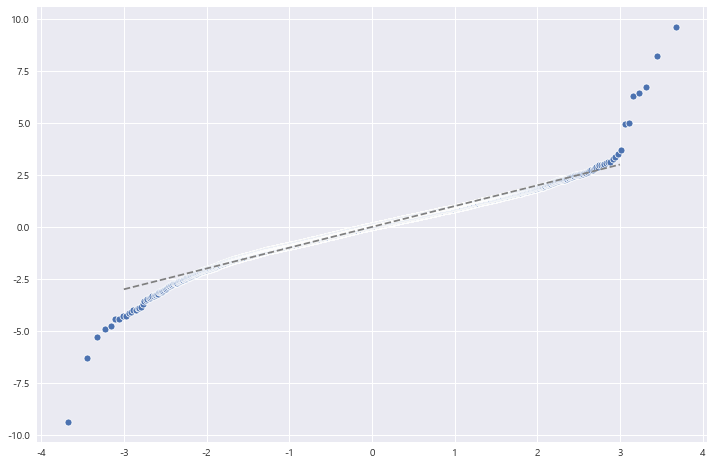

In [159]:
# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

* 오마이가뜨 양옆에서 직선의 형태를 제대로 벗어나고 있네요 ...
* 이정도는 어쩔 수 없다고 볼 수도 있고... 아니라고 볼 수도 있어요... 



* (노트북에는 없지만) 다른 모델의 Normal Q-Q Plot을 그려 봤는데 이것보다 더 나빠서 .. 그냥 이정도는 감수하기로 합시당 대부분 직선 형태를 따르니깐여 ㅎㅎ;;;

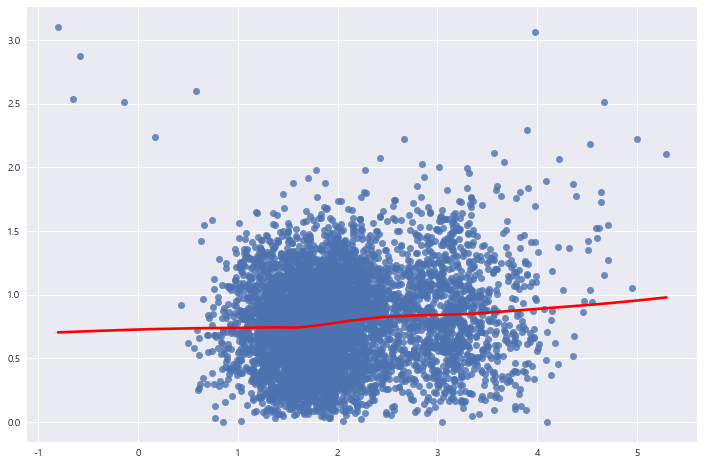

In [160]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

* 딱히 특이한 추세를 보이지 않으므로 등분산성을 만족하는 것으로 보입니다 ~ ! 